In [89]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

In [81]:
import os
print("Current Dir" ,os.getcwd())  # Prints the current working directory
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir, 'datasets', 'train')
test_path = os.path.join(curr_dir, 'datasets', 'test')
valid_path = os.path.join(curr_dir, 'datasets', 'valid')



Current Dir d:\AICT Project


In [82]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [83]:
training_set.class_names 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [84]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,  
    labels='inferred',
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [85]:
print("Class names in validation set:", validation_set.class_names)

Class names in validation set: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [86]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))

# Change the number of units in the output layer to match the number of classes (3 classes)
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [87]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

In [76]:
cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │     2,251,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,037,224 (38.29 MB)

 Trainable params: 10,037,224 (38.29 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,  # Fixed the typo here (from 'validaion_set' to 'validation_set')
    epochs=10
)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 753ms/step - accuracy: 0.4108 - loss: 1.1727 - val_accuracy: 0.6600 - val_loss: 0.7260
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 772ms/step - accuracy: 0.6795 - loss: 0.6726 - val_accuracy: 0.8100 - val_loss: 0.4423
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 835ms/step - accuracy: 0.8144 - loss: 0.4024 - val_accuracy: 0.8400 - val_loss: 0.3663
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 828ms/step - accuracy: 0.8563 - loss: 0.3694 - val_accuracy: 0.8567 - val_loss: 0.3203
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 889ms/step - accuracy: 0.8871 - loss: 0.3064 - val_accuracy: 0.8633 - val_loss: 0.3263
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 824ms/step - accuracy: 0.9129 - loss: 0.2078 - val_accuracy: 0.9233 - val_loss: 0.1825
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9442 - loss: 0.1565 - val_accuracy: 0.8900 - val_loss: 0.2641
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9612 - loss: 0.1050 - val_accuracy: 

In [92]:
train_loss, train_acc = cnn.evaluate(training_set)
print("Training Loss: ", train_loss)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.9672 - loss: 0.0964
Training Loss:  0.09182922542095184


In [93]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('validation accuracy', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9570 - loss: 0.2046
validation accuracy 0.9433333277702332


In [94]:
cnn.save('Train_potato_disease_model.keras')

In [95]:
training_history.history

{'accuracy': [0.44555556774139404,
  0.7077777981758118,
  0.804444432258606,
  0.8833333253860474,
  0.9011111259460449,
  0.9144444465637207,
  0.949999988079071,
  0.9588888883590698,
  0.9622222185134888,
  0.9655555486679077],
 'loss': [1.082738995552063,
  0.6079710721969604,
  0.4296860992908478,
  0.3084128797054291,
  0.269976407289505,
  0.21182842552661896,
  0.1450592577457428,
  0.10937248170375824,
  0.1021304503083229,
  0.08261049538850784],
 'val_accuracy': [0.6600000262260437,
  0.8100000023841858,
  0.8399999737739563,
  0.8566666841506958,
  0.8633333444595337,
  0.9233333468437195,
  0.8899999856948853,
  0.9333333373069763,
  0.9333333373069763,
  0.9433333277702332],
 'val_loss': [0.7260300517082214,
  0.44234156608581543,
  0.36627647280693054,
  0.3203408420085907,
  0.32633885741233826,
  0.18252143263816833,
  0.2640855014324188,
  0.17675648629665375,
  0.1686968356370926,
  0.20182204246520996]}

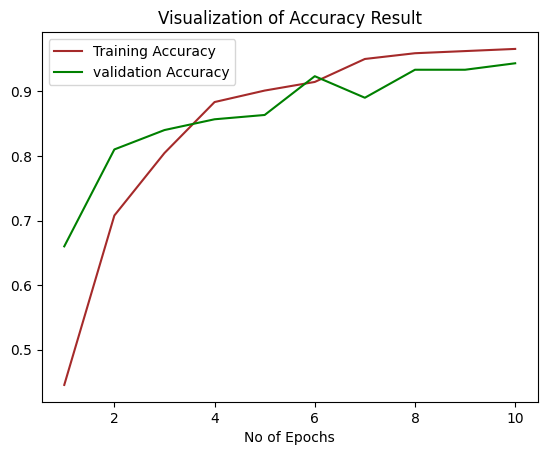

In [101]:
epochs = [ i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'] ,color="brown" , label="Training Accuracy")
plt.plot(epochs,training_history.history['val_accuracy'],color='green', label='validation Accuracy')
plt.xlabel('No of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()